<a href="https://colab.research.google.com/github/dalizar/Python-data-science-challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
#Comprobemos que nuestras fuentes contienen las mismas columnas
dataframes = [tienda, tienda2, tienda3, tienda4]
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('Todos los conjuntos de datos tienen las mismas columnas:')
else:
    print('Existen set con diferentes columnas')

print(tienda.columns)

#Echemos un vistazo a los datos cuantitativos
tienda.describe()

Todos los conjuntos de datos tienen las mismas columnas:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


#1. Análisis de facturación



In [ ]:
#Creemos un diccionario con las tiendas

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

#Ingreso total por cada tienda en la moneda local

ingresos_por_tienda = {}

print(f"Los ingresos totales, en miles de millones (COP), fueron:\n")

for nombre_tienda, df in tiendas.items():
    df['Precio'] = pd.to_numeric(df['Precio'])

    ingresos = (sum (df['Precio']))

    print (f"{nombre_tienda}: ${ingresos/1000000:,.0f}")
    ingresos_por_tienda[nombre_tienda] = ingresos

Los ingresos totales, en miles de millones (COP), fueron:

Tienda 1: $1,151
Tienda 2: $1,116
Tienda 3: $1,098
Tienda 4: $1,038


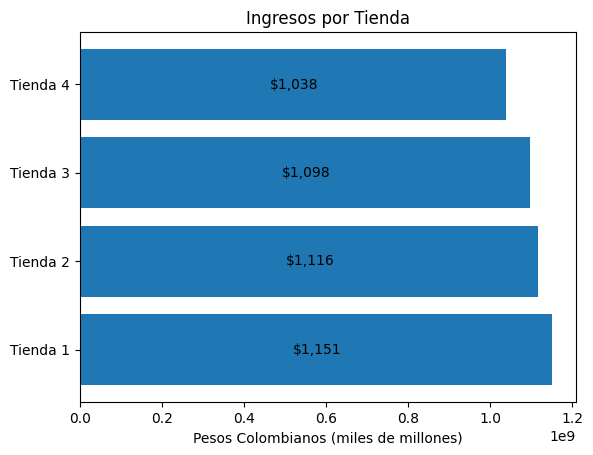

In [ ]:
# Gráfico de Ingresos por Tienda
fig, ax = plt.subplots()
barsh = ax.barh(tiendas.keys(), ingresos_por_tienda.values())

ax.bar_label(barsh,
             labels=[f'${v/1000000:,.0f}' for v in ingresos_por_tienda.values()],
             padding=1, label_type="center",
            )

ax.set_title('Ingresos por Tienda')
ax.set_xlabel('Pesos Colombianos (miles de millones)')
plt.show()

# 2. Ventas por categoría

In [ ]:
# Agrupamiento por categorías
ventas_por_categoria = {}

for nombre_tienda, df in tiendas.items():
    ventas_categoria = df['Categoría del Producto'].value_counts()
    ventas_por_categoria[nombre_tienda] = ventas_categoria

print("Cantidad de Ventas unitarias por Categoría:\n")
print(ventas_por_categoria)

Cantidad de Ventas unitarias por Categoría:

{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría de

In [ ]:
categorias_populares = {}

def top_categorias_ventas():
    for nombre_tienda, ventas in ventas_por_categoria.items():
      categorias_populares[nombre_tienda] = ventas.nlargest(3)
      print(nombre_tienda)
      print(f"{categorias_populares[nombre_tienda]}\n")


print(f"Categorías más populares (ventas unitarias):\n")

top_categorias_ventas()

Categorías más populares (ventas unitarias):

Tienda 1
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Tienda 2
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Tienda 3
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Tienda 4
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64



# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = {}

print(f"La calificación promedio fue: \n")

for nombre_tienda, df in tiendas.items():
    df['Calificación'] = pd.to_numeric(df['Calificación'])

    calificaciones = round((np.mean(df['Calificación'])),2)

    print (f"{nombre_tienda}: {calificaciones}")
    calificacion_promedio[nombre_tienda] = calificaciones

La calificación promedio fue: 

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


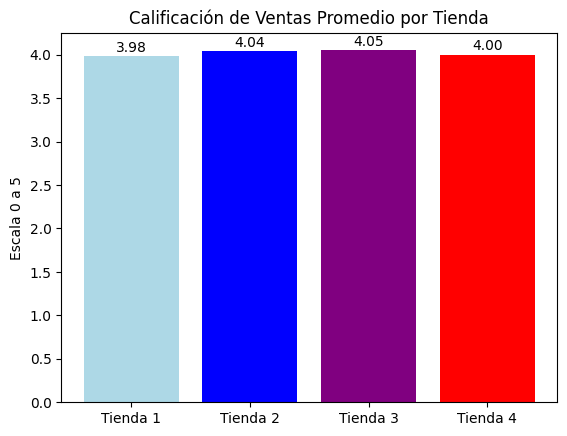

In [ ]:
# Gráfico de Calificación por Tienda
fig, ax = plt.subplots()
color = ['lightblue', 'blue', 'purple', 'red', 'black']
bars = ax.bar(tiendas.keys(), calificacion_promedio.values(), color=color)

ax.bar_label(bars,
             labels=[f'{v:,.2f}' for v in calificacion_promedio.values()],
             padding=1
            )

ax.set_title('Calificación de Ventas Promedio por Tienda')
ax.set_ylabel('Escala 0 a 5')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Agrupamiento por productos
ventas_por_producto = {}

for nombre_tienda, df in tiendas.items():
    ventas_producto = df['Producto'].value_counts()
    ventas_por_producto[nombre_tienda] = ventas_producto

print("Cantidad de Ventas unitarias por Categoría:\n")
print(ventas_por_producto)

Cantidad de Ventas unitarias por Categoría:

{'Tienda 1': Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV       

In [ ]:
productos_mas_vendidos = {}

def ventas_productos():
    for nombre_tienda, ventas in ventas_por_producto.items():
      productos_mas_vendidos[nombre_tienda] = ventas.nlargest(3)
      print(nombre_tienda)
      print(f"{productos_mas_vendidos[nombre_tienda]}\n")

print(f"Productos más populares (ventas unitarias):\n")

ventas_productos()

Productos más populares (ventas unitarias):

Tienda 1
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Tienda 4
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64



In [ ]:
productos_menos_vendidos = {}

def ventas_menos_productos():
    for nombre_tienda, ventas in ventas_por_producto.items():
      productos_menos_vendidos[nombre_tienda] = ventas.nsmallest(3)
      print(nombre_tienda)
      print(f"{productos_menos_vendidos[nombre_tienda]}\n")

print(f"Productos menos populares (ventas unitarias):\n")

ventas_menos_productos()

Productos menos populares (ventas unitarias):

Tienda 1
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Name: count, dtype: int64

Tienda 2
Producto
Juego de mesa      32
Mesa de comedor    34
Impresora          34
Name: count, dtype: int64

Tienda 3
Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Name: count, dtype: int64

Tienda 4
Producto
Guitarra eléctrica    33
Armario               34
Guitarra acústica     37
Name: count, dtype: int64



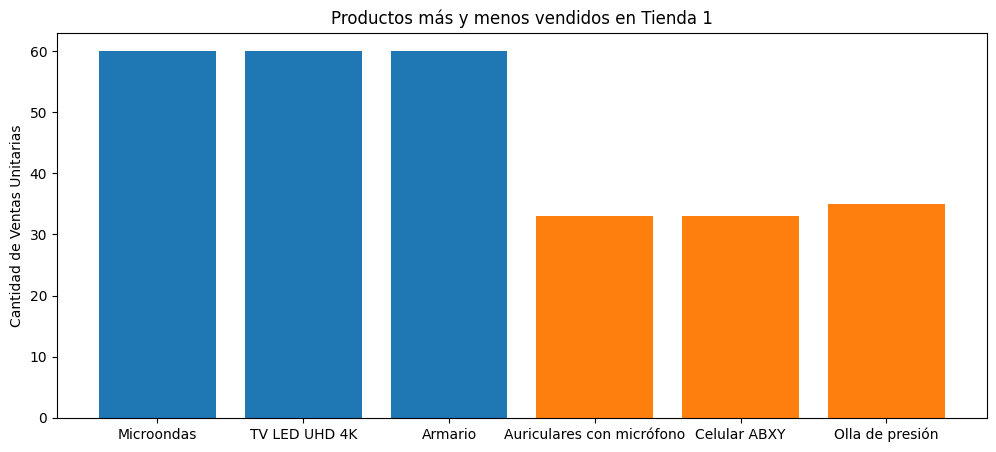

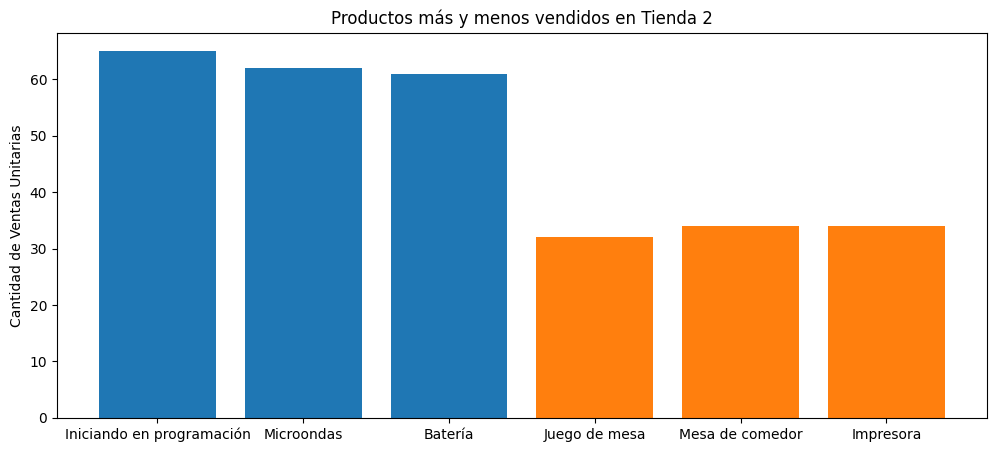

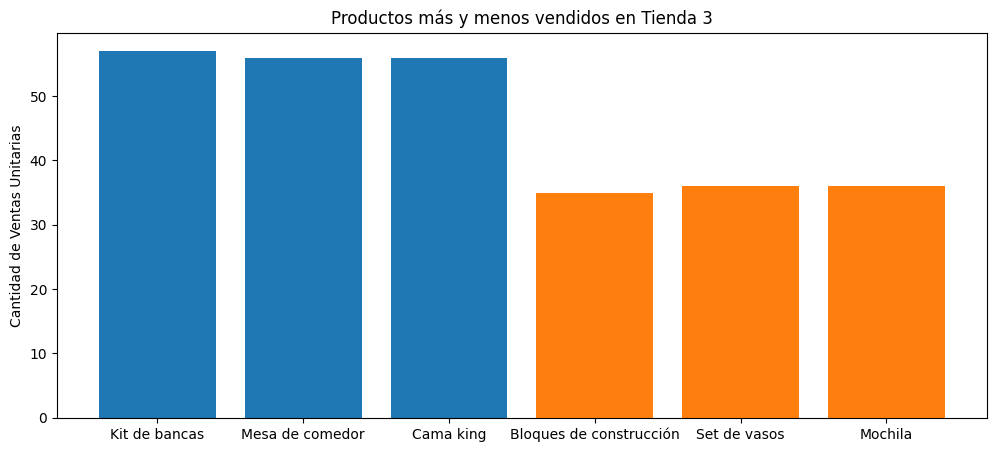

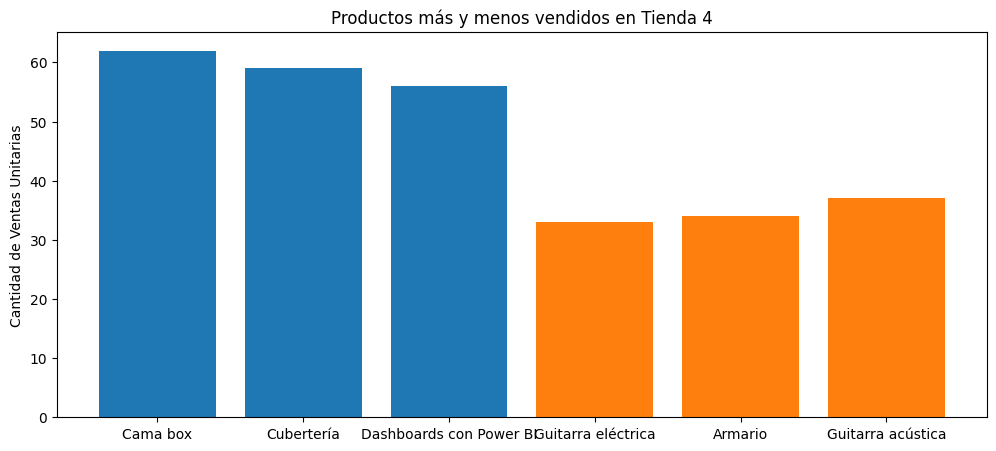

In [ ]:
def bars_ventas(nombre_tienda):
   x = productos_mas_vendidos[nombre_tienda].index
   y = productos_mas_vendidos[nombre_tienda].values
   x2 = productos_menos_vendidos[nombre_tienda].index
   y2 = productos_menos_vendidos[nombre_tienda].values

   plt.figure(figsize=(12, 5))
   plt.bar(x, y)
   plt.bar(x2, y2)
   plt.title(f'Productos más y menos vendidos en {nombre_tienda}')
   plt.ylabel('Cantidad de Ventas Unitarias')
   plt.show()

for nombre_tienda in tiendas.keys():
  bars_ventas(nombre_tienda)

# 5. Envío promedio por tienda

In [ ]:
costo_envio_promedio = {}

print(f"El costo de envío promedio fue: \n")

for nombre_tienda, df in tiendas.items():
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'])

    envio = round((np.mean(df['Costo de envío'])),2)

    print (f"{nombre_tienda}: ${envio:,.2f}")
    calificacion_promedio[nombre_tienda] = envio

El costo de envío promedio fue: 

Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


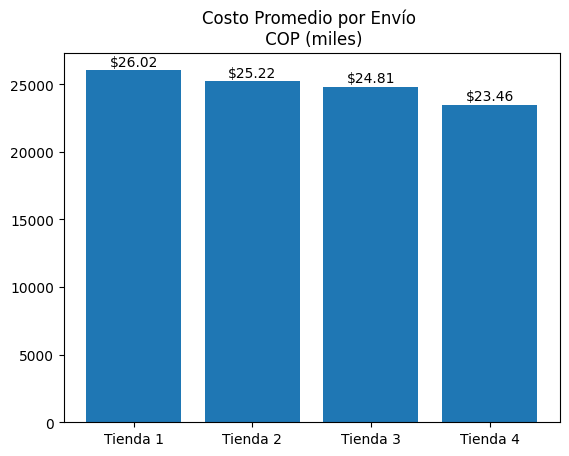

In [ ]:
# Gráfico de Costo Promedio por Envío
fig, ax = plt.subplots()
bars = ax.bar(tiendas.keys(), calificacion_promedio.values())

ax.bar_label(bars,
             labels=[f'${v/1000:,.2f}' for v in calificacion_promedio.values()],
             padding=1
            )

ax.set_title('Costo Promedio por Envío \n COP (miles)')
plt.show()